* Take auxTel observations (eg based on RubinTV https://roundtable.lsst.codes/rubintv/summit/auxtel ). 
* Select CWFS observations (i.e. donuts). 
* Preview the raw images. 
* Run ISR. 
* Run CWFS /  WEP to recover wavefront. 
* Run batoid simulations using that as input. Compare donuts. 

For recent 2023-01-18 https://roundtable.lsst.codes/rubintv/summit/auxtel/historical/2023-01-18:
        
        
    dataId = {"day_obs": 20230118, "seq_num": 745, "detector": 0}  : 748 

    dataId = {"day_obs": 20230118, "seq_num": 380, "detector": 0}  - 389 

    361-370

    327-332

    235-244

    195-198



Get these raws:

In [1]:
%matplotlib inline
from astropy.io import fits
from astropy.visualization import ZScaleInterval
import matplotlib.pyplot as plt
import numpy as np 
from lsst.daf import butler as dafButler


def preview_auxtel_exposures(year='2021', monthDay='0908', expStart=483, expEnd=490,
                            datasetRefOrType='raw', collection='LATISS/raw/all'):

    butler = dafButler.Butler('/sdf/data/rubin/repo/main/')
    
    # figure out how many images to plot
    nexp = expEnd-expStart

    # calculate how many cols and rows we need 
    if nexp > 3:
        ncol = 3
        nrows = (nexp // ncol) + 1
    else:
        ncol=nexp
        nrows = 1
        
    zscale = ZScaleInterval()
    # do the plotting 
    fig,axs = plt.subplots(nrows,ncol,figsize=(ncol*4,nrows*4))
    ax = np.ravel(axs)
    i=0
    for exp in range(expStart,expEnd):
        expN = str(exp).zfill(5)
        print(expN)
        
        
            
        exposure = butler.get(datasetRefOrType, dataId={'instrument':'LATISS', 'detector':0, 
                                         'exposure':int(f'{year}{monthDay}{expN}')
                                            },
                          collections=[collection])
        
        # get focusZ from exposureInfo rather than metadata...
        info = exposure.getInfo()
        visitInfo = info.getVisitInfo() 
        focusZ = visitInfo.focusZ
            
        data = exposure.image.array
        vmin, vmax = zscale.get_limits(data)
        ax[i].imshow(data,vmin=vmin,vmax=vmax,origin=
                  'lower')
        
        ax[i].set_title(f"{year}{monthDay}, exp {exp},\n focusz={np.round(focusZ,3)}")
        i += 1
    fig.subplots_adjust(hspace=0.25)

    # if there are more axes than exposures,
    # turn off the extra axes 
    ncells = nrows*ncol
    if ncells > nexp:
        for axis in ax[nexp:]:
            axis.axis("off")

Try https://roundtable.lsst.codes/rubintv/summit/auxtel/historical/2022-06-07  - seems that dates before the move to SDF got ported, and those afterwards not...

The CWFS seqNum are 

870-879
627-632
615-624
340-343
333-339
167-168
164-165
156-159 * 

In [3]:
butler = dafButler.Butler('/sdf/data/rubin/repo/main/')


In [23]:
l = butler.registry.queryDimensionRecords("exposure", 
                                          where="instrument = myinstrument AND exposure.day_obs = day", 
                                      bind={"day": 20220407, "myinstrument": "LATISS"})

In [24]:
for i in l:
    print(i)

exposure:
  instrument: 'LATISS'
  id: 2022040700018
  physical_filter: 'SDSSg~holo4_003'
  obs_id: 'AT_O_20220407_000018'
  exposure_time: 3.0
  dark_time: 3.09597778320312
  observation_type: 'dark'
  observation_reason: 'dark'
  day_obs: 20220407
  seq_num: 18
  seq_start: 18
  seq_end: 18
  group_name: '2022-04-07T21:05:47.061'
  group_id: 2292951470610000
  target_name: 'FlatField position'
  science_program: 'unknown'
  tracking_ra: None
  tracking_dec: None
  sky_angle: None
  azimuth: None
  zenith_angle: None
  has_simulated: False
  timespan: Timespan(begin=astropy.time.Time('2022-04-07 21:05:47.222436', scale='tai', format='iso'), end=astropy.time.Time('2022-04-07 21:05:50.229000', scale='tai', format='iso'))
exposure:
  instrument: 'LATISS'
  id: 2022040700001
  physical_filter: 'SDSSi~empty'
  obs_id: 'AT_O_20220407_000001'
  exposure_time: 0.0
  dark_time: 0.0945961475372314
  observation_type: 'bias'
  observation_reason: 'bias'
  day_obs: 20220407
  seq_num: 1
  seq_sta

exposure:
  instrument: 'LATISS'
  id: 2022040700495
  physical_filter: 'SDSSr~empty'
  obs_id: 'AT_O_20220407_000495'
  exposure_time: 30.0
  dark_time: 30.2373521327972
  observation_type: 'science'
  observation_reason: 'object'
  day_obs: 20220407
  seq_num: 495
  seq_start: 495
  seq_end: 495
  group_name: '2022-04-08T05:31:31.699'
  group_id: 2293254916990000
  target_name: 'LATISS_E6A_00000100'
  science_program: 'LATISS_E6A'
  tracking_ra: 221.962727454939
  tracking_dec: -45.6223881412865
  sky_angle: 0.00456691333275253
  azimuth: None
  zenith_angle: 18.638645501530803
  has_simulated: False
  timespan: Timespan(begin=astropy.time.Time('2022-04-08 05:33:25.821383', scale='tai', format='iso'), end=astropy.time.Time('2022-04-08 05:33:56.052000', scale='tai', format='iso'))
exposure:
  instrument: 'LATISS'
  id: 2022040700496
  physical_filter: 'SDSSg~empty'
  obs_id: 'AT_O_20220407_000496'
  exposure_time: 30.0
  dark_time: 30.3217141628265
  observation_type: 'science'
  obse

INFO:numexpr.utils:Note: detected 128 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
INFO:numexpr.utils:Note: NumExpr detected 128 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


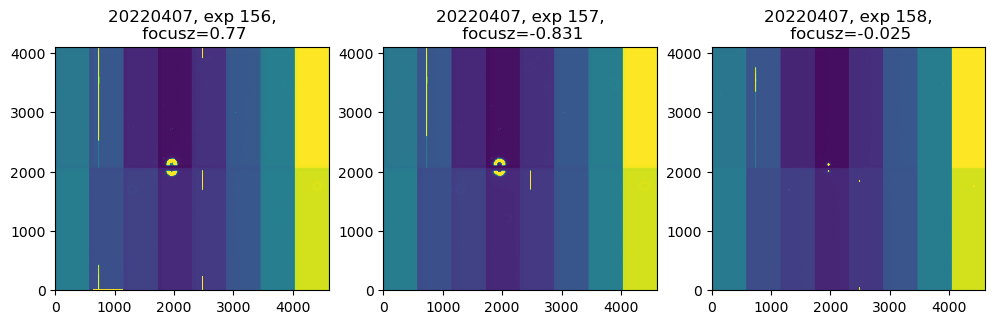

In [25]:
preview_auxtel_exposures(year='2022', monthDay='0407', expStart=156, expEnd=159)

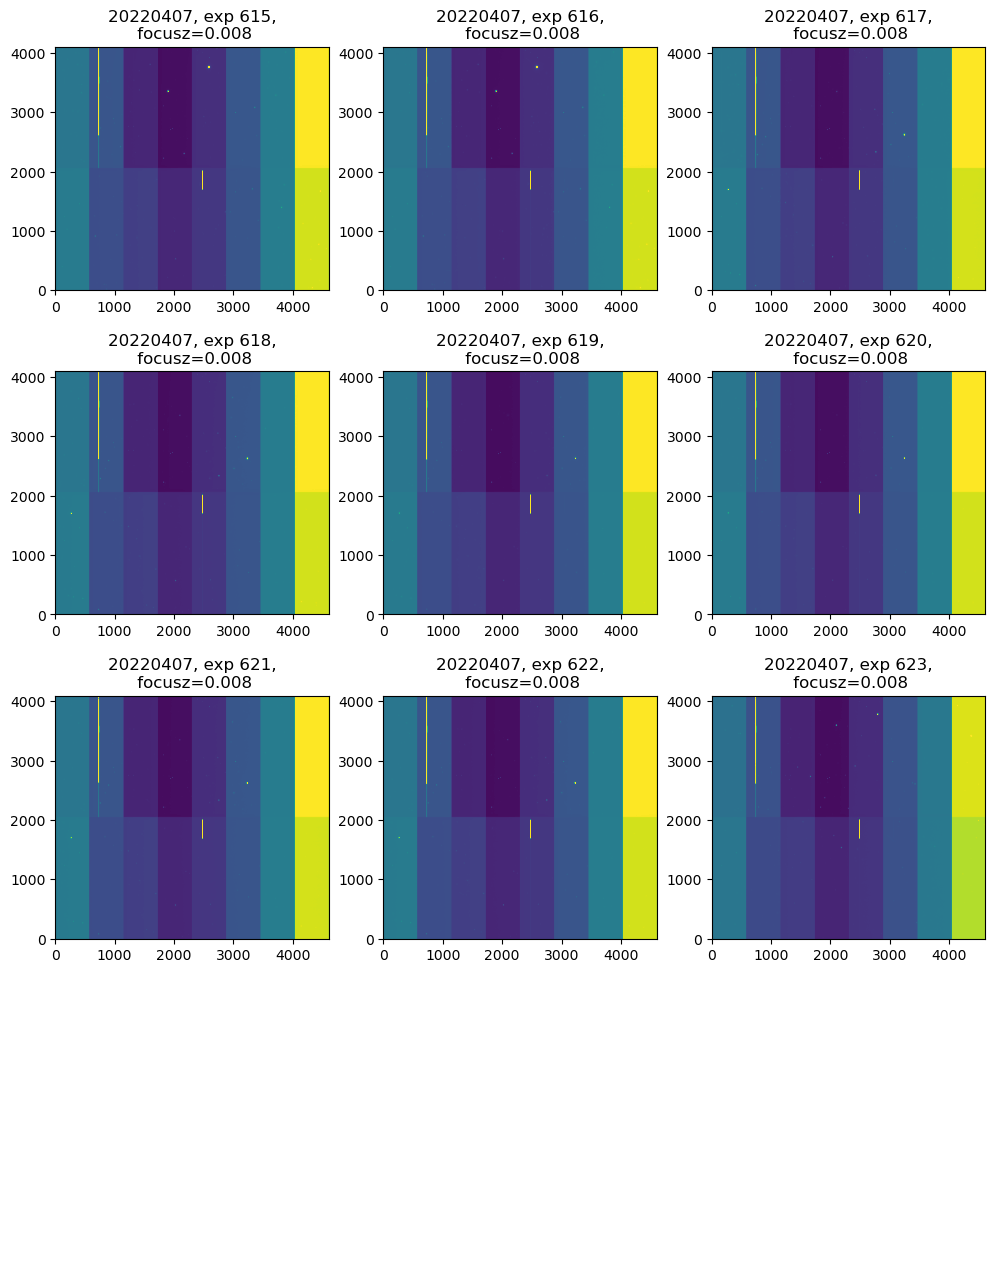

In [30]:
preview_auxtel_exposures(year='2022', monthDay='0407', expStart=615, expEnd=624)

To run the ISR with the following in `testLatiss1.yaml` : 

    description: ISR basic processing pipeline
    instrument: lsst.obs.lsst.Latiss
    tasks:
      isr:
        class: lsst.ip.isr.isrTask.IsrTask
        config:
          connections.outputExposure: postISRCCD
          doApplyGains: false
          doBias: true
          doBrighterFatter: false
          doCrosstalk: false
          doDark: true
          doDefect: false
          doFlat: true
          doFringe: true
          doInterpolate: true
          doLinearize: false
          doSaturation: true
          doSaturationInterpolation: true
          doNanMasking: false
          doOverscan: true
          doVariance: false
          overscan.fitType : 'MEDIAN_PER_ROW'
          overscan.leadingColumnsToSkip : 5

I run the pipetask : 

    pipetask run  --data-query "exposure IN (2022040700156,2022040700157) AND instrument='LATISS' " -b /sdf/data/rubin/repo/main/butler.yaml --input  LATISS/raw/all,LATISS/calib --output u/scichris/Latiss/DM-37269 --pipeline /sdf/home/s/scichris/link_to_scichris/WORK/AOS/DM-37396/testLatiss1.yaml  --register-dataset-types

How is it that the `raw` has `FOCUSZ`,  but the `postISRCCD` doesn't? 

In [70]:
butler = dafButler.Butler('/sdf/data/rubin/repo/main/')
year='2022'
monthDay='0407'
exp='157'.zfill(5)
collection='u/scichris/Latiss/DM-37269'
datasetRefOrType = 'raw'
exposure = butler.get(datasetRefOrType, dataId={'instrument':'LATISS', 'detector':0, 
                                 'exposure':int(f'{year}{monthDay}{exp}')
                                    },
                  collections=[collection])


In [72]:
visitInfo = info.getVisitInfo() 


In [73]:
visitInfo.focusZ

-0.83095395565033

In [54]:
meta = exposure.getMetadata()

In [55]:
for key, value in meta.items():
    print(key,value)

COMMENT ---- Geometry from Camera ----
ORIGIN LSST DM Header Service
DATE 2022-04-08T01:09:03.552
DATE-BEG 2022-04-08T01:09:07.700
DATE-END 2022-04-08T01:09:37.930
MJD 59677.0479577766
MJD-BEG 59677.0480057906
MJD-END 59677.0483556717
OBSID AT_O_20220407_000157
GROUPID 2022-04-08T01:08:24.808
IMGTYPE ENGTEST
BUNIT adu
FACILITY Vera C. Rubin Observatory
TELESCOP LSST AuxTelescope
INSTRUME LATISS
OBSERVER LSST
OBSGEO-X 1818938.94
OBSGEO-Y -5208470.95
OBSGEO-Z -3195172.08
RA 156.71258
DEC -30.0729377777778
RASTART 156.712689513448
DECSTART -30.0729918726397
RAEND 156.712794374261
DECEND -30.0729856793208
ROTPA 188.818646292879
ROTCOORD sky
HASTART -0.954034876980007
ELSTART 77.6859456880775
AZSTART 93.4214945924468
AMSTART 1.02347613036362
HAEND -0.944901364903079
ELEND 77.8047831936565
AZEND 93.385316957254
AMEND 1.02301886006299
INSTPORT 2
ATM3PORT None
TRACKSYS SIDEREAL
DOMEAZ 90.6
SHUTLOWR 100.0
SHUTUPPR 100.0
CAMCODE AT
CONTRLLR O
DAYOBS 20220407
SEQNUM 157
TESTTYPE ENGTEST
EMUIMAGE 

But I see `FOCUSZ` right there! 

In [45]:
meta['FOCUSZ']

-0.83095395565033

In [ ]:
Both 156 and 157 have that. So what's going on ? 

00156
00157


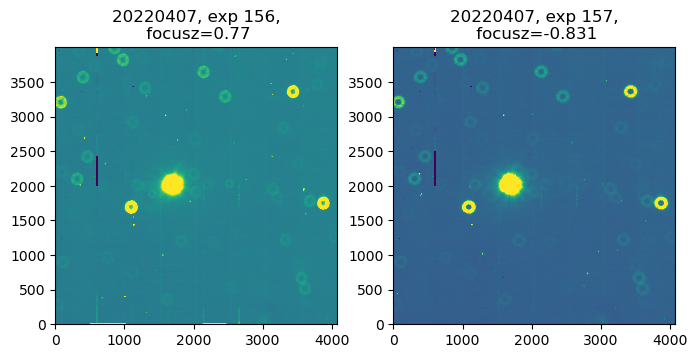

In [76]:
preview_auxtel_exposures(datasetRefOrType='postISRCCD', collection='u/scichris/Latiss/DM-37269',
                        year='2022', monthDay='0407', expStart=156, expEnd=158)

# Donut detection / cutting out with `ts_wep` tasks. 

Use `generateDonutDirectDetect` as a task, but use `centroid` as the `binaryChoice` to make it faster. 

Then `CutOutDonutsScienceSensorTask`, and finally `CalcZernikesTask` . 

In [ ]:
Run with `ts_wep` v4.0.3  (that fixes the `GenerateDonutDirectDetect` )

In [2]:
butler = dafButler.Butler('/sdf/data/rubin/repo/main/')
year='2022'
monthDay='0407'

collection='u/scichris/Latiss/DM-37269'
datasetRefOrType = 'postISRCCD'
exposure_intra = butler.get(datasetRefOrType, dataId={'instrument':'LATISS', 'detector':0, 
                                 'exposure':int(f'{year}{monthDay}00156')
                                    },
                  collections=[collection])
exposure_extra =  butler.get(datasetRefOrType, dataId={'instrument':'LATISS', 'detector':0, 
                                 'exposure':int(f'{year}{monthDay}00157')
                                    },
                  collections=[collection])

In [3]:
from lsst.ts.wep.task.GenerateDonutDirectDetectTask import (
GenerateDonutDirectDetectTask, GenerateDonutDirectDetectTaskConfig
)
from lsst.ts.wep.task.CutOutDonutsScienceSensorTask import (
    CutOutDonutsScienceSensorTask, CutOutDonutsScienceSensorTaskConfig
)
from lsst.ts.wep.task.CalcZernikesTask import (
    CalcZernikesTask, CalcZernikesTaskConfig)


# run donut detect task
donutDetectConfig = GenerateDonutDirectDetectTaskConfig()


INFO:numexpr.utils:Note: detected 128 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
INFO:numexpr.utils:Note: NumExpr detected 128 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [4]:
#donutDetectConfig.binaryChoice = 'centroid'
donutDetectConfig.binaryChoice = 'deblend'
donutDetectConfig.donutTemplateSize = 200
donutDetectConfig.opticalModel = 'onAxis'
donutDetectConfig.instObscuration = 0.3525

# do I need to set these parameters as well ? ? 


# pexConfig.Field(
#         doc="Obscuration (inner_radius / outer_radius of M1M3)",
#         dtype=float,
#         default=0.61,
#     )
#     instFocalLength = pexConfig.Field(
#         doc="Instrument Focal Length in m", dtype=float, default=10.312
#     )
#     instApertureDiameter = pexConfig.Field(
#         doc="Instrument Aperture Diameter in m", dtype=float, default=8.36
#     )
#     instDefocalOffset = pexConfig.Field(
#         doc="Instrument defocal offset in mm. \
#         If None then will get this from the focusZ value in exposure visitInfo. \
#         (The default is None.)",
#         dtype=float,
#         default=None,
#         optional=True,
#     )
#     instPixelSize = pexConfig.Field(
#         doc="Instrument Pixel Size in m", dtype=float, default=10.0e-6


In [5]:
camera  = butler.get(
        "camera",
        dataId={"instrument": "LATISS"},
        collections="LATISS/calib/unbounded",
    )

donutDetectTask = GenerateDonutDirectDetectTask(config = donutDetectConfig)

Why do I get `donutCatalogIntra` instantly, but `donutCatalogExtra` takes so long it practically never finishes  ?

What's wrong with using 'binaryChoice = centroid' in that case ?   

If I try `binaryChoice = deblend`, it runs, but takes (expected) about 2.5mins. 

In [6]:
donutCatalogIntra = donutDetectTask.run(exposure_intra, camera)

In [7]:
donutCatalogExtra = donutDetectTask.run(exposure_extra, camera)

It just never finishes... Show what it looks like...

00156
00157


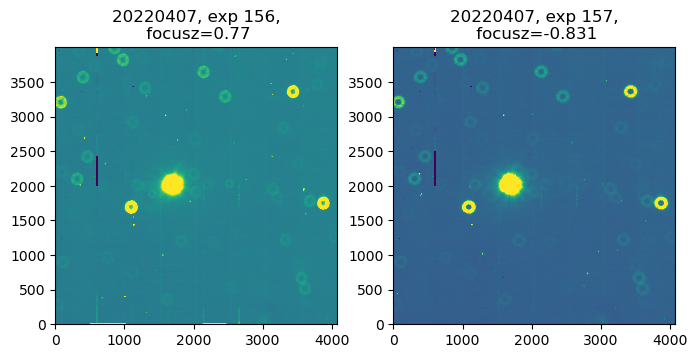

In [6]:
preview_auxtel_exposures(datasetRefOrType='postISRCCD', collection='u/scichris/Latiss/DM-37269',
                        year='2022', monthDay='0407', expStart=156, expEnd=158)

In [53]:
donutCatalogExtra

1    1683
2    3922
6     529
Name: centroid_x, dtype: int64

In [54]:
donutCatalogExtra.donutCatalog['centroid_y']

1    2083
2    1791
6    2422
Name: centroid_y, dtype: int64

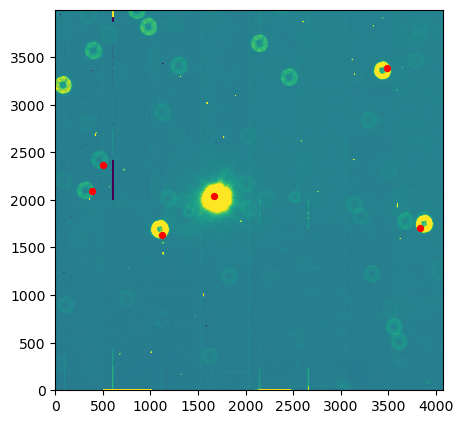

In [60]:
fig,ax = plt.subplots(1,1,figsize=(5,5))

data = exposure_intra.image.array
vmin, vmax = zscale.get_limits(data)
ax.imshow(data, vmin=vmin, vmax=vmax,origin='lower',)

for i in range(len(donutCatalogIntra)):
    x = donutCatalogIntra.donutCatalog['centroid_y']
    y = donutCatalogIntra.donutCatalog['centroid_x']
    ax.scatter(y,x,s=18,c='red')

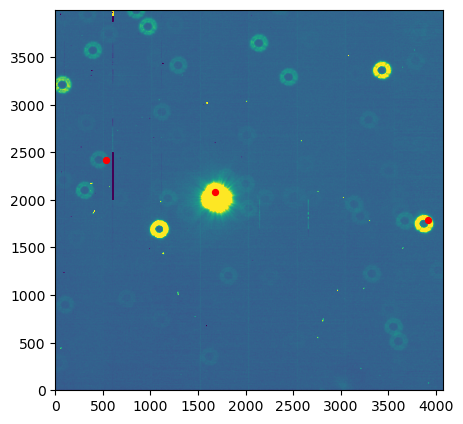

In [63]:
fig,ax = plt.subplots(1,1,figsize=(5,5))

data = exposure_extra.image.array
vmin, vmax = zscale.get_limits(data)
ax.imshow(data, vmin=vmin, vmax=vmax,origin='lower',)

for i in range(len(donutCatalogExtra)):
    x = donutCatalogExtra.donutCatalog['centroid_y']
    y = donutCatalogExtra.donutCatalog['centroid_x']
    ax.scatter(y,x,s=18,c='red')

(1687, 2071)


(-0.010659359722222225, 0.0017278263888888944)

Point2D(3861, 1801)

In [96]:
stamp = donutStampsIntra[0]
print(stamp.centroid_position)
fieldXYintra = stamp.calcFieldXY()

(1687, 2071)


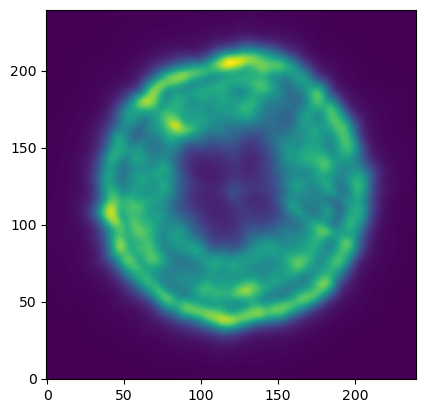

In [72]:
x=2010
y=1700
dx=120
dy=120
stamp_intra = exposure_intra.image.array[x-dx:x+dx,  y-dy:y+dy]
plt.imshow(stamp_intra, origin='lower')

In [104]:
stamp = donutStampsExtra[0]
print(stamp.centroid_position)
fieldXYextra = stamp.calcFieldXY()

(1628, 1992)


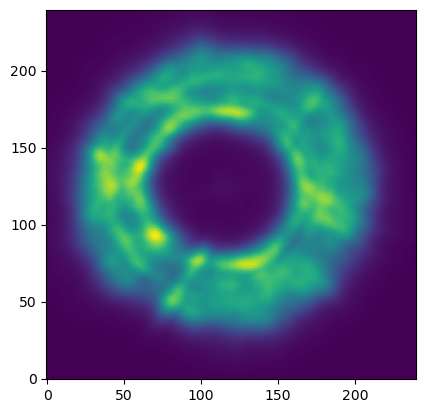

In [73]:
x=2010
y=1700
dx=120
dy=120
stamp_extra = exposure_extra.image.array[x-dx:x+dx,  y-dy:y+dy]
plt.imshow(stamp_extra, origin='lower')

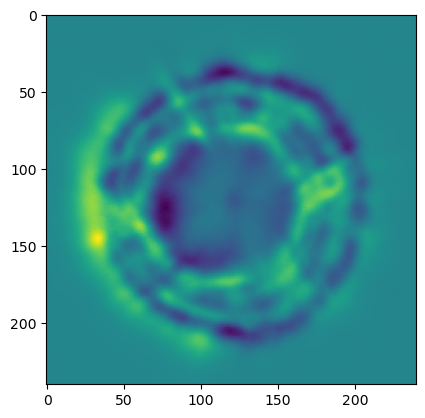

In [74]:
plt.imshow(stamp_extra-stamp_intra)

All the centroids are off...

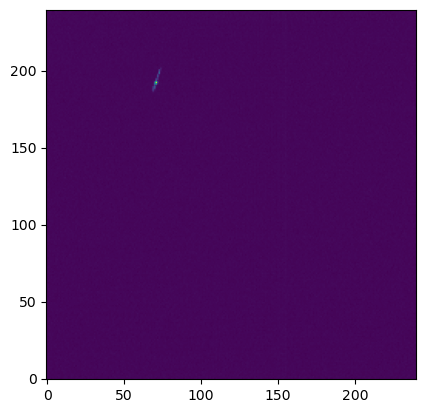

In [68]:
plt.imshow(stamp_intra, origin='lower')

Looks just fine! Some problem with `centroid`... 

In [10]:
cutOutDonutsConfig = CutOutDonutsScienceSensorTaskConfig()
cutOutDonutsConfig.donutStampSize = 200
cutOutDonutsConfig.donutTemplateSize = 200
cutOutDonutsConfig.initialCutoutPadding = 40
cutOutDonutsConfig.opticalModel = 'onAxis'
cutOutDonutsTask = CutOutDonutsScienceSensorTask(config=cutOutDonutsConfig)


In [11]:
struct = cutOutDonutsTask.run([exposure_intra, exposure_extra],
                         [donutCatalogIntra.donutCatalog, 
                          donutCatalogExtra.donutCatalog],
                             camera)

In [15]:
struct.donutStampsExtra

In [16]:
donutStampsExtra = struct.donutStampsExtra
donutStampsIntra = struct.donutStampsIntra

In [19]:
calcZernikesTask.run??

In [21]:
from lsst.ts.wep.task.CalcZernikesTask import (
    CalcZernikesTask, CalcZernikesTaskConfig)

calcZernikesConfig = CalcZernikesTaskConfig()
calcZernikesConfig.opticalModel = 'onAxis'
calcZernikesTask = CalcZernikesTask(config=calcZernikesConfig)

taskOutput = calcZernikesTask.run(donutStampsExtra,donutStampsIntra)

INFO:CombineZernikesSigmaClipTask:Using 3 pairs out of 3 in final Zernike estimate.


In [27]:
zks

array([[-3.55944466e-01, -4.99268777e+00,  7.17672420e+00,
         2.39255623e-02,  2.77644035e-01, -7.43519009e-01,
        -4.13416000e-01,  4.93236057e-02, -6.64785834e-02,
         1.58545900e-01, -8.92125165e-02, -2.15645319e-01,
        -4.23278616e-03, -4.22804425e-03,  1.59663477e-02,
         4.89024741e-03,  3.67597428e-01,  1.48201580e-01,
        -1.46028931e-03],
       [-2.09417392e-02, -2.68366003e+00,  4.18252200e+00,
        -2.17413413e-01,  2.15456486e-02, -1.88601068e-01,
         2.43682178e-01,  2.58733008e-02, -8.35660715e-02,
         6.73844064e-02,  6.94068150e-02, -3.98268370e-02,
         1.30436077e-03,  2.08940841e-02,  2.32909701e-03,
        -2.77061984e-03, -1.27500985e-01, -1.90671978e-01,
        -3.80987715e-03],
       [ 1.63879608e-01, -1.38694010e+00,  1.74927562e+00,
        -4.24666840e-02, -1.36003864e-01,  2.53134337e-01,
        -3.56109862e-02,  1.41602400e-02, -4.66870722e-02,
         4.00364296e-02, -1.32863521e-01, -1.53550868e-01,
    

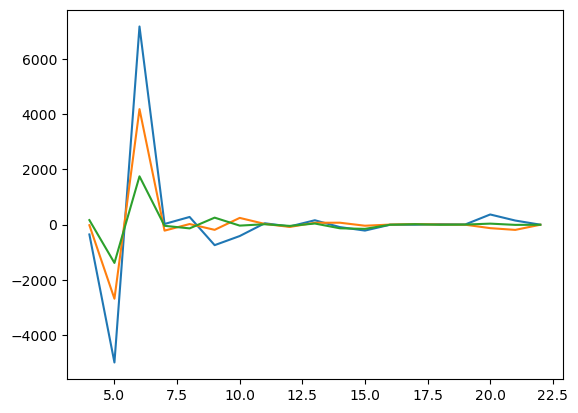

In [28]:
zks = taskOutput.outputZernikesRaw

for i in range(len(zks)):
    plt.plot(np.arange(4,23), zks[i]*1e3)

doesn't make any sense... Do I need to feed `calcZernikesTask` with all the definitions of `auxTel` given that the camera already has all these info ? 

This looks fine, but donut detection doesn't work.  Try running something else that doesn't take forever... Eg. the `quickMeasurementTask`... 

In [ ]:
Also, the image gets transposed inside which is needed for `phosim` images, but not for `auxTel` images... 

# Try detecting donuts with `QuickMeasurement` task, and cutting out with `latiss_wep_align` code 

In [18]:
from lsst.pipe.tasks.quickFrameMeasurement import QuickFrameMeasurementTask
qm_config = QuickFrameMeasurementTask.ConfigClass()
qm = QuickFrameMeasurementTask(config=qm_config)


side = 120
intra_result = qm.run(exposure_intra, donutDiameter=2 * side)
extra_result = qm.run(exposure_extra, donutDiameter=2 * side)

INFO:lsst.quickFrameMeasurementTask:Found 43 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Measured 43 of 43 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Found 23 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Measured 23 of 23 sources in exposure


In [19]:
intra_result

Struct(success=True; brightestObjCentroid=(1698.0, 2094.0); brightestObjCentroidCofM=(1700.3419560208697, 2019.7809139254266); brightestObj_xXyY=(11.462921697822441, 22.017017969038562); brightestObjApFlux70=107898409.5595932; brightestObjApFlux25=24783832.233398438; medianXxYy=(0.11171612599330413, 0.27772521479296114))

Cutout donuts given that... 

## [Aside] Try directly `afwDetect`... 

In [31]:
import lsst.afw.detection as afwDetect
nSigma = 6
threshold = afwDetect.Threshold(nSigma, afwDetect.Threshold.STDEV)
nPixMin = 50
footPrintSet = afwDetect.FootprintSet(exposure_intra.getMaskedImage(), threshold, "DETECTED", nPixMin)

In [41]:
fps

[1 peaks, area=506, centroid=(761.5, 0),
 1 peaks, area=106, centroid=(2181.5, 0),
 1 peaks, area=189, centroid=(2359, 0),
 75 peaks, area=306, centroid=(2657.06, 92.8562),
 8 peaks, area=50, centroid=(1558.02, 1000.18),
 10 peaks, area=74, centroid=(1136.47, 1433.24),
 52 peaks, area=185, centroid=(2657.05, 1769.09),
 2233 peaks, area=20751, centroid=(1102.63, 1687.18),
 2054 peaks, area=16822, centroid=(3876.24, 1743.33),
 63 peaks, area=229, centroid=(2657.03, 1898.41),
 13 peaks, area=93, centroid=(3592.78, 1938.43),
 2950 peaks, area=64653, centroid=(1697.75, 2015.26),
 12 peaks, area=72, centroid=(426.417, 2687.32),
 11 peaks, area=51, centroid=(82.6471, 3286.25),
 14 peaks, area=52, centroid=(3477.31, 3344.4),
 1798 peaks, area=11769, centroid=(3435.91, 3351.5),
 6 peaks, area=116, centroid=(606.578, 3945.52),
 27 peaks, area=1253, centroid=(729.673, 3996.79)]

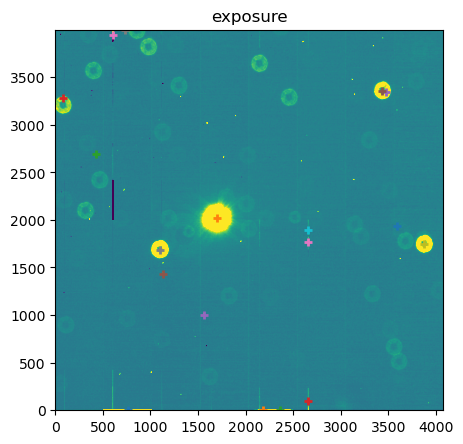

In [40]:
from astropy.visualization import ZScaleInterval

zscale = ZScaleInterval()

fps  = footPrintSet.getFootprints()


fig,ax = plt.subplots(1,1,figsize=(5,5))

data = exposure_intra.image.array
vmin, vmax = zscale.get_limits(data)
ax.imshow(data, vmin=vmin, vmax=vmax,origin='lower',)
ax.set_title('exposure')

for fp in fps:
    point = fp.getCentroid()
    x,y = point.getX(), point.getY()
    ax.scatter(x,y, marker='+', lw=2)

## Create donut catalog from qm result

In [60]:
import pandas
from lsst.afw.geom import SkyWcs
from lsst.afw.image import ExposureF
from lsst.pipe.base.struct import Struct
def get_donut_catalog(result: Struct, wcs: SkyWcs) -> pandas.DataFrame:
    """Get the donut catalog, used by wep, from the quick frame measurement
    result.
    Parameters
    ----------
    result : `Struct`
        Result of `QuickFrameMeasurementTask`.
    wcs : `SkyWcs`
        Exposure WCS, to compute Ra/Dec.
    Returns
    -------
    donut_catalog : `pandas.DataFrame`
        Donut catalog.
    """
    ra, dec = wcs.pixelToSkyArray(
        result.brightestObjCentroidCofM[0],
        result.brightestObjCentroidCofM[1],
        degrees=False,
    )

    donut_catalog = pandas.DataFrame([])
    donut_catalog["coord_ra"] = ra
    donut_catalog["coord_dec"] = dec
    donut_catalog["centroid_x"] = [result.brightestObjCentroidCofM[0]]
    donut_catalog["centroid_y"] = [result.brightestObjCentroidCofM[1]]
    donut_catalog["source_flux"] = [result.brightestObjApFlux70]
    donut_catalog["blend_centroid_x"] = [list()]
    donut_catalog["blend_centroid_y"] = [list()]
    donut_catalog = donut_catalog.sort_values(
        "source_flux", ascending=False
    ).reset_index(drop=True)

    return donut_catalog

In [80]:
intra_result.brightestObjCentroidCofM[0]

1700.3419560208697

In [61]:
position_out_of_range = False
donut_catalog_intra = get_donut_catalog(intra_result, exposure_intra.getWcs())
donut_catalog_extra = get_donut_catalog(
    *(
        (extra_result, exposure_extra.getWcs())
        if position_out_of_range
        else (intra_result, exposure_intra.getWcs())
    )
)

In [62]:
donut_catalog_intra

coord_ra  coord_dec   centroid_x   centroid_y   source_flux  \
0  2.735358  -0.524907  1700.341956  2019.780914  1.078984e+08   

  blend_centroid_x blend_centroid_y  
0               []               []

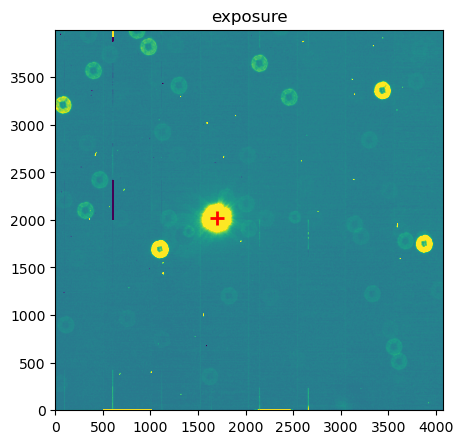

In [63]:
from astropy.visualization import ZScaleInterval

zscale = ZScaleInterval()

fig,ax = plt.subplots(1,1,figsize=(5,5))

data = exposure_intra.image.array
vmin, vmax = zscale.get_limits(data)
ax.imshow(data, vmin=vmin, vmax=vmax,origin='lower',)
ax.set_title('exposure')

x = donut_catalog_intra['centroid_x'][0]
y = donut_catalog_intra['centroid_y'][0]
ax.scatter(x,y, marker='+', lw=2, s=100,c='r')

show the location in the image given the donut catalog ... 

Text(0.5, 1.0, 'intra')

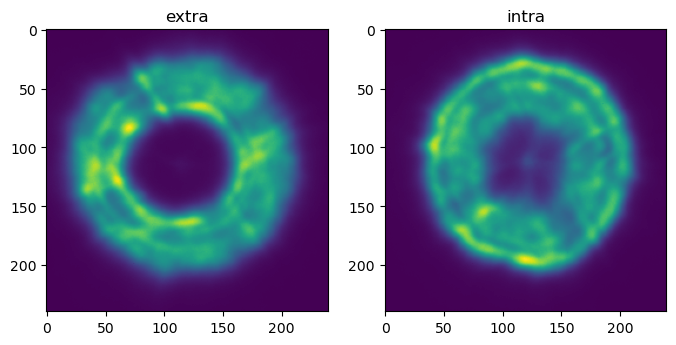

In [81]:
y = int(donut_catalog_intra['centroid_x'][0])
x = int(donut_catalog_intra['centroid_y'][0])
dx=120
dy=120
stamp_intra = exposure_intra.image.array[x-dx:x+dx,  y-dy:y+dy]

y = int(donut_catalog_extra['centroid_x'][0])
x = int(donut_catalog_extra['centroid_y'][0])

stamp_extra = exposure_extra.image.array[x-dx:x+dx,  y-dy:y+dy]


fig,ax = plt.subplots(1,2,figsize=(8,4))
ax[0].imshow(stamp_extra)
ax[0].set_title('extra')
ax[1].imshow(stamp_intra)
ax[1].set_title('intra')

Given that the donut catalog seems to be correct, use that donut catalog to cut out stamps: 

In [64]:
from lsst.ts.wep.task.CutOutDonutsScienceSensorTask import (
    CutOutDonutsScienceSensorTask, CutOutDonutsScienceSensorTaskConfig
)
from lsst.ts.wep.task.CalcZernikesTask import (
    CalcZernikesTask, CalcZernikesTaskConfig)


camera  = butler.get(
        "camera",
        dataId={"instrument": "LATISS"},
        collections="LATISS/calib/unbounded",
    )

cutOutDonutsConfig = CutOutDonutsScienceSensorTaskConfig()
cutOutDonutsConfig.donutStampSize = 200
cutOutDonutsConfig.donutTemplateSize = 200
cutOutDonutsConfig.initialCutoutPadding = 40
cutOutDonutsConfig.opticalModel = 'onAxis'

cutOutDonutsTask = CutOutDonutsScienceSensorTask(config=cutOutDonutsConfig)
struct = cutOutDonutsTask.run([exposure_intra, exposure_extra],
                         [donut_catalog_intra, donut_catalog_extra],
                             camera)



show the donut stamps:

Text(0.5, 1.0, 'intra')

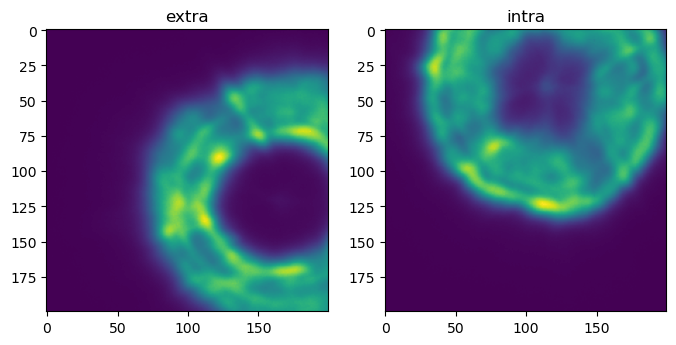

In [74]:
fig,ax = plt.subplots(1,2,figsize=(8,4))
ax[0].imshow(struct.donutStampsExtra[0].stamp_im.image.array)
ax[0].set_title('extra')
ax[1].imshow(struct.donutStampsIntra[0].stamp_im.image.array)
ax[1].set_title('intra')

In [ ]:
plt.imshow(struct.donutStampstra[0].stamp_im.image.array)

In [ ]:
from lsst.ts.wep.task.EstimateZernikesLatissTask import (
        EstimateZernikesLatissTask,
        EstimateZernikesLatissTaskConfig,
    )

stamp_diameter = int(2 * side) 

config = EstimateZernikesLatissTaskConfig()
config.donutStampSize = stamp_diameter
config.donutTemplateSize = stamp_diameter
config.opticalModel = "onAxis"

task = EstimateZernikesLatissTask(config=config)

camera = butler.get(
    "camera",
    dataId={"instrument": "LATISS"},
    collections="LATISS/calib/unbounded",
)

task_output = task.run(
    [exposure_intra, exposure_extra],
    [donut_catalog_intra, donut_catalog_extra],
    camera,
)

# Run wep / cwfs

ok, now run the `wep` and `cwfs` ... Use donuts cut out with `wep` tasks. 

In [42]:
donutStampsExtra

In [43]:
donutStampsIntra

In [45]:
stamp = donutStampsExtra[0]

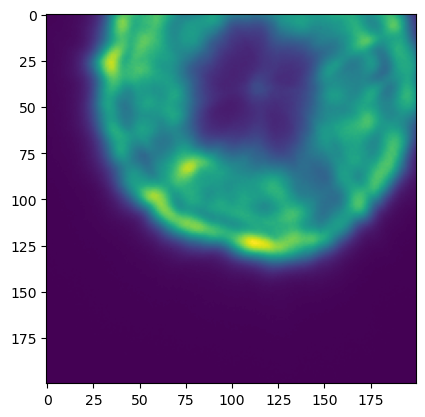

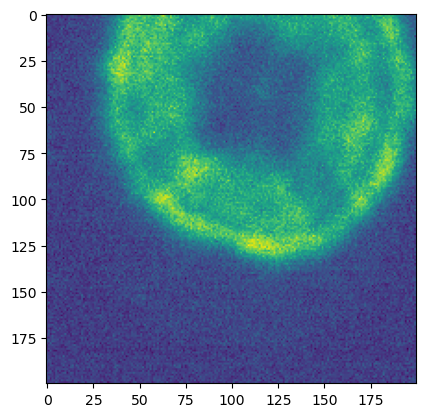

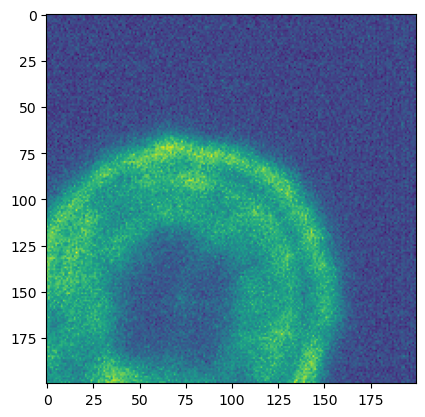

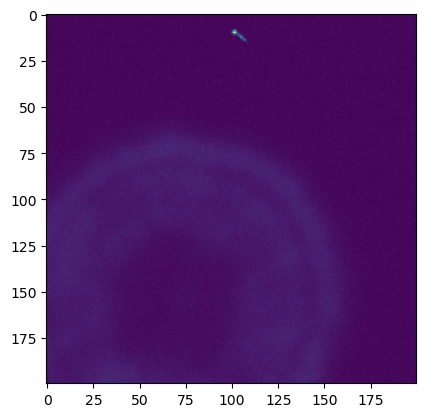

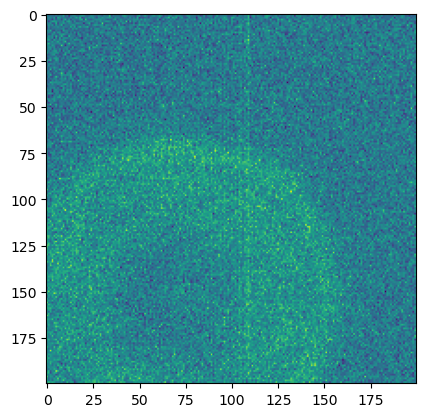

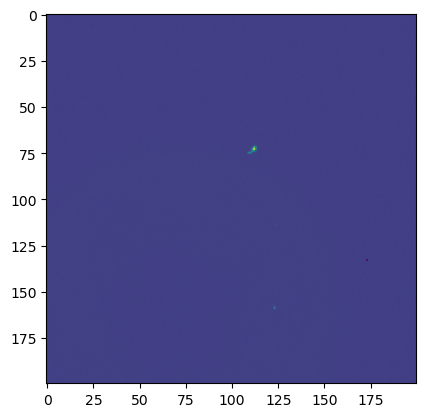

In [52]:
for i in range(len(donutStampsIntra)):
    stamp = donutStampsIntra[i]
    plt.figure()
    plt.imshow(stamp.stamp_im.image.array)

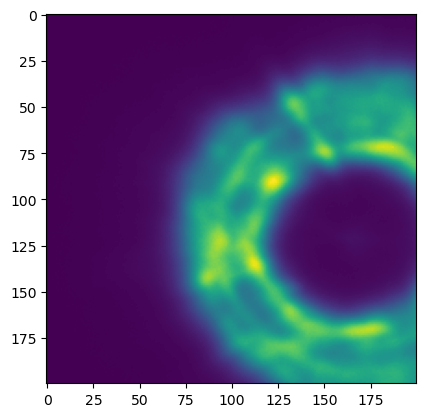

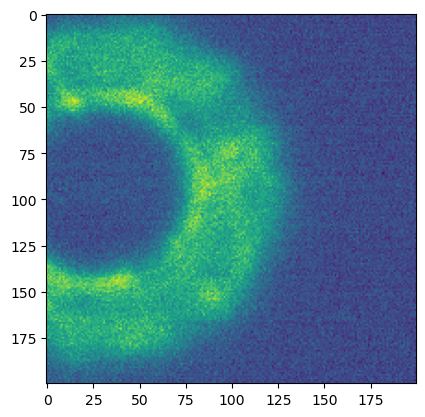

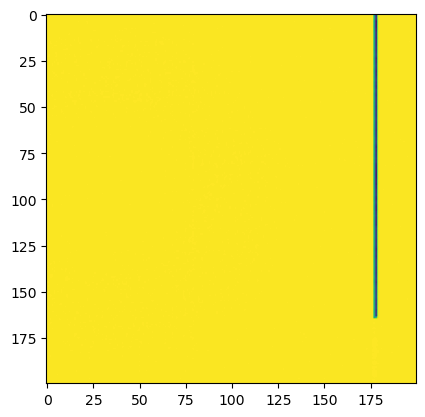

In [51]:
for i in range(len(donutStampsExtra)):
    stamp = donutStampsExtrxa[i]
    plt.figure()
    plt.imshow(stamp.stamp_im.image.array)

In [66]:
donutCatalogExtra

Struct(donutCatalog=   centroid_y  centroid_x blend_centroid_y blend_centroid_x  blended  \
1        2083        1683               []               []    False   
2        1791        3922               []               []    False   
6        2422         529               []               []    False   

  blended_with  num_blended_neighbors detector  coord_ra  coord_dec  
1         None                      0  RXX_S00  2.735361  -0.524937  
2         None                      0  RXX_S00  2.734199  -0.524644  
6         None                      0  RXX_S00  2.735944  -0.525174  )

Why are none cut out in the correct location?? 

In [ ]:
# run the CWFS fit ...
from lsst import cwfs
from lsst.cwfs.algorithm import Algorithm as AlgorithmCwfs
from lsst.cwfs.image import Image
from lsst.cwfs.instrument import Instrument as InstrumentCwfs
from pathlib import Path


def fit_cwfs(intra_stamp, extra_stamp, side=120, fieldXYIntra = [0.0, 0.0], fieldXYExtra=[0.0, 0.0],
            opticalModel="paraxial", obscuration=0.3525, _dz =  0.8):
    '''
     There is  "defocal offset" with a value of 32.8 mm  from 
     https://github.com/lsst-ts/ts_wep/blob/develop/policy/cwfs/instData/auxTel/instParamPipeConfig.yaml
     
     The value of _dz=0.8  is used in latiss_base_align.py;
     if I set _dz = 0.8, then   0.8*0.041  = 32.8 * 1e-3 , i.e. same as in ts_wep config ....
     
     Originally the cwfs param has:

    #Auxiliary Telescope parameters:
    Obscuration                             0.3525
    Focal_length (m)                        21.6
    Aperture_diameter (m)                   1.2
    Offset (m)                              0.0205
    Pixel_size (m)                          1.44e-5

    (from https://github.com/lsst-ts/cwfs/blob/master/data/AuxTel/AuxTel.param )

    '''
    # this value is in the latiss_base_align.py
    # if I set _dz = 0.8, then   0.8*0.041  = 32.8 * 1e-3 , i.e. same as in ts_wep config ....
    binning = 1  
    #side = 110  #  https://github.com/lsst-ts/ts_externalscripts/blob/8ba110cd64a134bf7d4efca424477c26deec96eb/tests/auxtel/test_latiss_cwfs_align.py#L525
    # from https://github.com/lsst-ts/ts_externalscripts/blob/8ba110cd64a134bf7d4efca424477c26deec96eb/python/lsst/ts/externalscripts/auxtel/latiss_base_align.py#L169

    #0.0205

    # Create configuration file with the proper parameters
    cwfs_config_template = f"""#Auxiliary Telescope parameters:
    Obscuration 				{obscuration}
    Focal_length (m)			21.6
    Aperture_diameter (m)   		1.2
    Offset (m)				{_dz * 0.041}
    Pixel_size (m)			{10e-6 *binning}
    """
    config_index = "auxtel_latiss"
    path = Path(cwfs.__file__).resolve().parents[3].joinpath("data", config_index)
    #print(path)
    if not path.exists():
        os.makedirs(path)
    dest = path.joinpath(f"{config_index}.param")
    with open(dest, "w") as fp:
        # Write the file and set the offset and pixel size parameters
        fp.write(cwfs_config_template)

    inst = InstrumentCwfs(config_index, int(side * 2 / binning))
    algo = AlgorithmCwfs("exp", inst, 1)

    # initialize intra and extra stamps 
    I1 = Image(intra_stamp, fieldXYIntra, Image.INTRA)
    I2 = Image(extra_stamp, fieldXYExtra, Image.EXTRA)


    algo.reset(I1,I2)
    algo.runIt(inst, I1, I2, opticalModel)
    zer4UpNm = algo.zer4UpNm

    # return the fit result
    return zer4UpNm

In [83]:
from lsst.ts.wep.Utility import (
    getConfigDir,
    DonutTemplateType,
    DefocalType,
    CamType,
    getCamType,
    getDefocalDisInMm,
    CentroidFindType
)
from lsst.ts.wep.cwfs.Instrument import Instrument
from lsst.ts.wep.cwfs.Algorithm import Algorithm
from lsst.ts.wep.cwfs.CompensableImage import CompensableImage

import numpy as np

def fit_ts_wep(intra_stamp, extra_stamp, fieldXYIntra=np.zeros(2), 
               fieldXYExtra=np.zeros(2), sizeInPix = 240,
              opticalModel = 'onAxis'):
    #fieldXY = np.zeros(2)

    instName = 'auxTel'
    
     # here we make bigger stamps than the usual 200  # donut stamp size 
    configDir = getConfigDir()
    algoDir = os.path.join(configDir, "cwfs", "algo")
    tol=1e-3

    # this is part of the init
    inst = Instrument()
    algo = Algorithm(algoDir)

    # inside estimateZernikes()
    camType = getCamType(instName)

    # inside wfEsti.config
    inst.configFromFile(sizeInPix, camType)

    # choose the solver for the algorithm
    solver = 'exp' # by default
    debugLevel = 1 # 1 to 3
    algo.config(solver, inst, debugLevel=debugLevel)

    centroidFindType = CentroidFindType.RandomWalk
    imgIntra = CompensableImage(centroidFindType=centroidFindType)
    imgExtra = CompensableImage(centroidFindType=centroidFindType)

    #fieldXYIntra = fieldXY
    #fieldXYExtra = fieldXYIntra

    # now inside  `wfEsti.setImg` method,
    # which inherits from `CompensableImage`
    imgExtra.setImg(fieldXYExtra,
                    DefocalType.Extra,
                    image = extra_stamp)
  
    imgIntra.setImg(fieldXYIntra,
                    DefocalType.Intra,
                    image = intra_stamp)
    
    algo.runIt(imgIntra, imgExtra, opticalModel, tol=tol)

    zer4UpInNm = algo.getZer4UpInNm()
    
    return zer4UpInNm



Fit with wep:

In [107]:
wepZk = {}
for model in ['onAxis', 'paraxial']:
    wepZk[model] = fit_ts_wep(stamp_intra, stamp_extra, fieldXYIntra=np.zeros(2), 
                              fieldXYExtra=np.zeros(2), 
                              sizeInPix = 240.,
                             opticalModel=model)

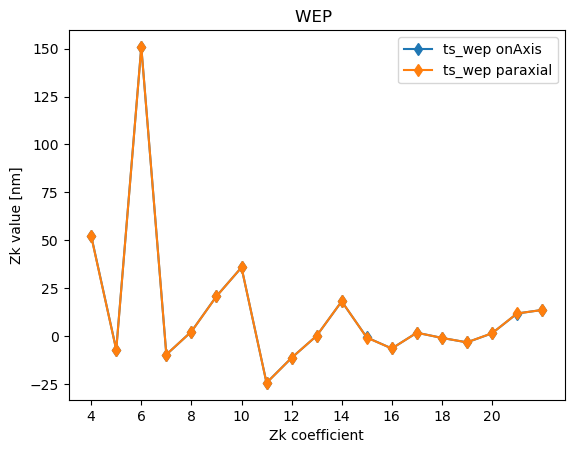

In [80]:
plt.figure()
    
for model in wepZk.keys():
    zk = wepZk[model]
        
    plt.plot(np.arange(4,23), zk, '-d', label=f'ts_wep {model}')
    plt.xticks(range(4,22)[::2])
    plt.title(f'WEP ')
    plt.legend()
    plt.xlabel('Zk coefficient')
    plt.ylabel('Zk value [nm]')

Also, try to see if using slightly different `fieldXY` has much impact on the result in that case:

In [108]:
wepZk2 = {}
for model in ['onAxis', 'paraxial']:
    wepZk2[model] = fit_ts_wep(stamp_intra, stamp_extra, fieldXYIntra=fieldXYintra, 
                              fieldXYExtra=fieldXYextra, 
                              sizeInPix = 240.,
                             opticalModel=model)

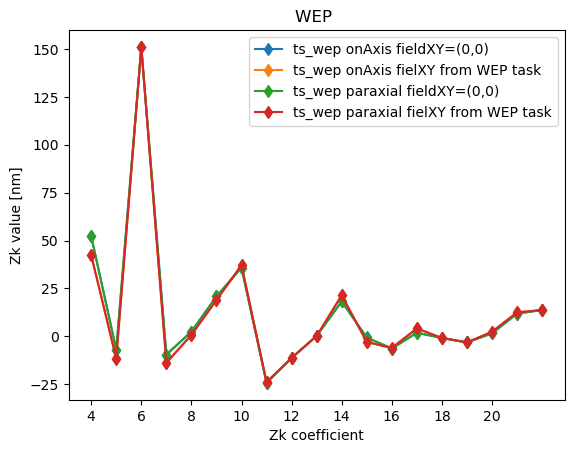

In [109]:
plt.figure()
    
for model in wepZk.keys():
    zk = wepZk[model]
    plt.plot(np.arange(4,23), zk, '-d', label=f'ts_wep {model} fieldXY=(0,0)')
    
    zk = wepZk2[model]
    plt.plot(np.arange(4,23), zk, '-d', label=f'ts_wep {model} fielXY from WEP task')
    
    plt.xticks(range(4,22)[::2])
    plt.title(f'WEP ')
    plt.legend()
    plt.xlabel('Zk coefficient')
    plt.ylabel('Zk value [nm]')

Not much - use then the result that uses `fieldXY` from wep...

So very tiny differnce.  Use as an input to batoid, and compare the simulated donuts: 

In [1]:
import numpy as np # standard package for doing calculations
import matplotlib.pyplot as plt # standard package for plotting

import batoid
import galsim

import sys
sys.path.append('/sdf/data/rubin/gpfs/ncsa-home/home/scichris/aos/wfsim/')
import wfsim

def simulate_auxtel_zernikes(seed = 0, 
                             z_in = [0,0,0,0,200e-9,0,0,0,0,0,0,0],
                             fname = "auxTel_batoid_.npy", outDir = 'DM-37269'):
    ''' 
    Simulate auxTel donuts with input Zernike wavefront as phase screen.
    
    NB: 
    z_in contains z0,z1,z2....z11   
    so eg. z_in = [0,0,0,200e-9,0,0...] means z3=200e-9 [m],
    i.e. 200 nm 
    
    NB: z_in must be in meters! 
    So  eg. result of ts_wep fit, which is in nanometers, 
    needs to be converted to meters ! 
    z_meters = z_nm  * 1e-9 


    
    '''

    auxtel = batoid.Optic.fromYaml("AuxTel.yaml")
    bandpass = galsim.Bandpass("LSST_r.dat", wave_type='nm')
    rng = np.random.default_rng(seed)

    # parameters associated with the observing conditions
    obs_params = {
        # zenith=0 means straight up, while zenith=90 is the horizon
        # greater zenith angle means more atmospheric turbulence
        "zenith": 30 * galsim.degrees,

        # raw_seeing sets how much atmospheric turbulence there is at zenith=0
        # wfsim uses this to calculate how much turbulence there is at 
        # the zenith angle given above
        "raw_seeing": 0.7 * galsim.arcsec,

        # these next three parameters set attributes of the atmosphere, which
        # help determine how much turbulence there is
        "temperature": 293, # Kelvin
        "pressure": 69, # kPa
        "H2O_pressure": 1, # kPa

        # wavelength of the observed light. this is important because light of 
        # longer/shorter wavelength refracts less/more in the atmosphere
        "wavelength": bandpass.effective_wavelength, # nanometers

        # the AuxTel exposure time
        "exptime": 30, # seconds
    }

    # parameters associated with computational aspects of simulating the atmosphere
    atm_params = {
        "screen_size": 819.2,
        "screen_scale": 0.1,
        "nproc": 3,
    }

    # since the wavelength is 622 nm, 
    # +/- 200 nm corresponds to +/- 0.3 waves of perturbation
    #z_in = rng.uniform(-200e-9, 200e-9, size=12)
    
    #z_in = np.zeros(12)
    #z_in[5] = 200e-9
    phase = batoid.Zernike(
        np.array(z_in),
        R_outer=0.6,
        R_inner=0.2115
        
    )
    perturbed = batoid.CompoundOptic(
            (
            batoid.optic.OPDScreen(
                batoid.Plane(),
                phase,
                name='PhaseScreen',
                obscuration=batoid.ObscNegation(batoid.ObscCircle(5.0)),
                coordSys=auxtel.stopSurface.coordSys
            ),
            *auxtel.items
        ),
        name='PerturbedAuxTel',
        backDist=auxtel.backDist,
        pupilSize=auxtel.pupilSize,
        inMedium=auxtel.inMedium,
        stopSurface=auxtel.stopSurface,
        sphereRadius=auxtel.sphereRadius,
        pupilObscuration=auxtel.pupilObscuration
    )


    intra = perturbed.withGloballyShiftedOptic("M2", [0, 0, -0.0008])
    extra = perturbed.withGloballyShiftedOptic("M2", [0, 0, +0.0008])


    # start the simulator 
    intra_simulator = wfsim.SimpleSimulator(
        obs_params,
        atm_params,
        intra,
        bandpass,
        shape=(4000, 4000),
        rng=rng
    )

    extra_simulator = wfsim.SimpleSimulator(
        obs_params,
        atm_params,
        extra,
        bandpass,
        shape=(4000, 4000),
        rng=rng
    )

    wavelength  =  bandpass.effective_wavelength * 1e-9 # batoid wants meters 
    # the fractional inner radius is 
    # eps = inner_radius / outer_radius = 0.2538 / 0.6 =  0.423 [m]


    # choose a position for the star
    # these angles specify the angle from the optical axis to the star
    thx = np.deg2rad(0)
    thy = np.deg2rad(0)


    zs = batoid.zernike(perturbed, thx, thy, wavelength, eps=0.3525)
    zs*=wavelength  #  waves -> m 
    
    # create a spectrum for the star -- this is needed for chromatic refraction
    # we will randomly select a plausible star temperature, 
    # and calculate the corresponding blackbody spectrum
    star_temp = rng.uniform(4_000, 10_000) # Kelvin
    sed = wfsim.BBSED(star_temp) # wfsim has a function to calculate the blackbody spectrum

    # randomly choose a flux (must be an integer)
    flux = 1800000#rng.integers(1_000_000, 2_000_000)

    intra_simulator.add_star(thx, thy, sed, flux, rng)
    extra_simulator.add_star(thx, thy, sed, flux, rng)

    print(f'saved {fname}')
    fpath = os.path.join(outDir,fname)
    np.savez(fpath,
        intra=intra_simulator.image.array,
        extra=extra_simulator.image.array, 
        zktruth=zs)
    return intra_simulator.image.array, extra_simulator.image.array, zs


In [114]:
len(wepZk2['onAxis'])

19

WEP output starts from Zk4-22. So need to add four zeros to the array:

In [115]:
zk4upNm = wepZk2['onAxis']

In [118]:
zk0upNm = np.pad(zk4upNm, pad_width=(4,0), mode='constant')

In [119]:
len(zk0upNm)

23

In [122]:
np.array(zk0upNm)

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        4.25638271e+01, -1.15640675e+01,  1.51067425e+02, -1.38813010e+01,
        7.51286739e-01,  1.89297032e+01,  3.71368769e+01, -2.38633952e+01,
       -1.13242692e+01,  1.50160423e-01,  2.13837556e+01, -2.91929923e+00,
       -6.11499325e+00,  4.13259819e+00, -8.79025639e-01, -3.20899222e+00,
        2.33676452e+00,  1.24872601e+01,  1.37147970e+01])

Now it's Zk0:22  , fed to batoid 

In [2]:
import numpy as np # standard package for doing calculations
import matplotlib.pyplot as plt # standard package for plotting

import batoid
import galsim

import sys
sys.path.append('/sdf/data/rubin/gpfs/ncsa-home/home/scichris/aos/wfsim/')
import wfsim

# this is the result of fitting with ts_wep, optical model onAxis, 
# using fieldXY from WEP...

z_in_nm = np.array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        4.25638271e+01, -1.15640675e+01,  1.51067425e+02, -1.38813010e+01,
        7.51286739e-01,  1.89297032e+01,  3.71368769e+01, -2.38633952e+01,
       -1.13242692e+01,  1.50160423e-01,  2.13837556e+01, -2.91929923e+00,
       -6.11499325e+00,  4.13259819e+00, -8.79025639e-01, -3.20899222e+00,
        2.33676452e+00,  1.24872601e+01,  1.37147970e+01])

z_in = z_in_nm*1e-9
seed=0

''' 
Simulate auxTel donuts with input Zernike wavefront as phase screen.

NB: 
z_in contains z0,z1,z2....z11   
so eg. z_in = [0,0,0,200e-9,0,0...] means z3=200e-9 [m],
i.e. 200 nm 
NB: z_in must be in meters! 
So  eg. result of ts_wep fit, which is in nanometers, 
needs to be converted to meters ! 
z_meters = z_nm  * 1e-9 
'''

auxtel = batoid.Optic.fromYaml("AuxTel.yaml")
bandpass = galsim.Bandpass("LSST_r.dat", wave_type='nm')
rng = np.random.default_rng(seed)

# parameters associated with the observing conditions
obs_params = {
    # zenith=0 means straight up, while zenith=90 is the horizon
    # greater zenith angle means more atmospheric turbulence
    "zenith": 30 * galsim.degrees,

    # raw_seeing sets how much atmospheric turbulence there is at zenith=0
    # wfsim uses this to calculate how much turbulence there is at 
    # the zenith angle given above
    "raw_seeing": 0.7 * galsim.arcsec,

    # these next three parameters set attributes of the atmosphere, which
    # help determine how much turbulence there is
    "temperature": 293, # Kelvin
    "pressure": 69, # kPa
    "H2O_pressure": 1, # kPa

    # wavelength of the observed light. this is important because light of 
    # longer/shorter wavelength refracts less/more in the atmosphere
    "wavelength": bandpass.effective_wavelength, # nanometers

    # the AuxTel exposure time
    "exptime": 30, # seconds
}

# parameters associated with computational aspects of simulating the atmosphere
atm_params = {
    "screen_size": 819.2,
    "screen_scale": 0.1,
    "nproc": 3,
}

# since the wavelength is 622 nm, 
# +/- 200 nm corresponds to +/- 0.3 waves of perturbation
#z_in = rng.uniform(-200e-9, 200e-9, size=12)

#z_in = np.zeros(12)
#z_in[5] = 200e-9
phase = batoid.Zernike(
    np.array(z_in),
    R_outer=0.6,
    R_inner=0.2115

)
perturbed = batoid.CompoundOptic(
            (
            batoid.optic.OPDScreen(
                batoid.Plane(),
                phase,
                name='PhaseScreen',
                obscuration=batoid.ObscNegation(batoid.ObscCircle(5.0)),
                coordSys=auxtel.stopSurface.coordSys
            ),
            *auxtel.items
        ),
        name='PerturbedAuxTel',
        backDist=auxtel.backDist,
        pupilSize=auxtel.pupilSize,
        inMedium=auxtel.inMedium,
        stopSurface=auxtel.stopSurface,
        sphereRadius=auxtel.sphereRadius,
        pupilObscuration=auxtel.pupilObscuration
    )


intra = perturbed.withGloballyShiftedOptic("M2", [0, 0, -0.0008])
extra = perturbed.withGloballyShiftedOptic("M2", [0, 0, +0.0008])

# start the simulator 
intra_simulator = wfsim.SimpleSimulator(
    obs_params,
    atm_params,
    intra,
    bandpass,
    shape=(4000, 4000),
    rng=rng
)

extra_simulator = wfsim.SimpleSimulator(
    obs_params,
    atm_params,
    extra,
    bandpass,
    shape=(4000, 4000),
    rng=rng
)


INFO:numexpr.utils:Note: detected 128 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
INFO:numexpr.utils:Note: NumExpr detected 128 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [ ]:

wavelength  =  bandpass.effective_wavelength * 1e-9 # batoid wants meters 
# the fractional inner radius is 
# eps = inner_radius / outer_radius = 0.2538 / 0.6 =  0.423 [m]


# choose a position for the star
# these angles specify the angle from the optical axis to the star
thx = np.deg2rad(0)
thy = np.deg2rad(0)


zs = batoid.zernike(perturbed, thx, thy, wavelength, eps=0.3525)
zs*=wavelength  #  waves -> m 

# create a spectrum for the star -- this is needed for chromatic refraction
# we will randomly select a plausible star temperature, 
# and calculate the corresponding blackbody spectrum
star_temp = rng.uniform(4_000, 10_000) # Kelvin
sed = wfsim.BBSED(star_temp) # wfsim has a function to calculate the blackbody spectrum

# randomly choose a flux (must be an integer)
flux = 1800000#rng.integers(1_000_000, 2_000_000)

intra_simulator.add_star(thx, thy, sed, flux, rng)
extra_simulator.add_star(thx, thy, sed, flux, rng)


In [6]:
fname = "2022040700156_auxTel_batoid_wepZk2_seed_0.npy"
outDir = 'DM-37629'
fpath = os.path.join(outDir,fname)
print(f'saved {fpath}')

np.savez(fpath,
    intra=intra_simulator.image.array,
    extra=extra_simulator.image.array, 
    zktruth=zs)

saved DM-37629/2022040700156_auxTel_batoid_wepZk2_seed_0.npy


In [ ]:
intra_image, extra_image, batoid_zk = simulate_auxtel_zernikes(seed = 10, 
                         z_in = zk0upNm,
                         fname = "auxTel_batoid_wep_zk.npy", outDir = 'DM-37269')

In [ ]:
zk0upNm

In [9]:
%matplotlib inline
from astropy.io import fits
from astropy.visualization import ZScaleInterval
import matplotlib.pyplot as plt
import numpy as np 
from lsst.daf import butler as dafButler

butler = dafButler.Butler('/sdf/data/rubin/repo/main/')
year='2022'
monthDay='0407'

collection='u/scichris/Latiss/DM-37269'
datasetRefOrType = 'postISRCCD'
exposure_intra = butler.get(datasetRefOrType, dataId={'instrument':'LATISS', 'detector':0, 
                                 'exposure':int(f'{year}{monthDay}00156')
                                    },
                  collections=[collection])
exposure_extra =  butler.get(datasetRefOrType, dataId={'instrument':'LATISS', 'detector':0, 
                                 'exposure':int(f'{year}{monthDay}00157')
                                    },
                  collections=[collection])
x=2010
y=1700
dx=120
dy=120
stamp_intra = exposure_intra.image.array[x-dx:x+dx,  y-dy:y+dy]
stamp_extra = exposure_extra.image.array[x-dx:x+dx,  y-dy:y+dy]

intra_image = intra_simulator.image.array
extra_image = extra_simulator.image.array

y=2000
x=1600
stamp_intra_batoid = intra_image[x-dx:x+dx,  y-dy:y+dy]
stamp_extra_batoid = extra_image[x-dx:x+dx,  y-dy:y+dy]


Text(0.5, 1.0, 'auxTel intra')

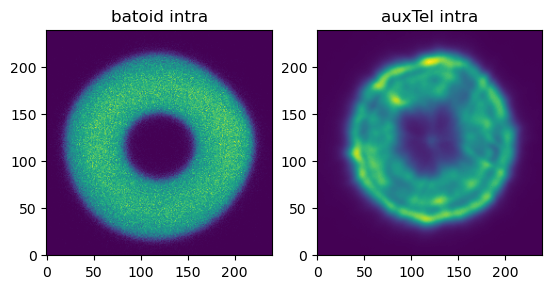

In [14]:

fig,ax = plt.subplots(1,2)
ax[0].imshow(stamp_intra_batoid , origin='lower')

ax[0].set_title('batoid intra')
ax[1].imshow(stamp_intra, origin='lower')
ax[1].set_title('auxTel intra')

Text(0.5, 1.0, 'auxTel extra')

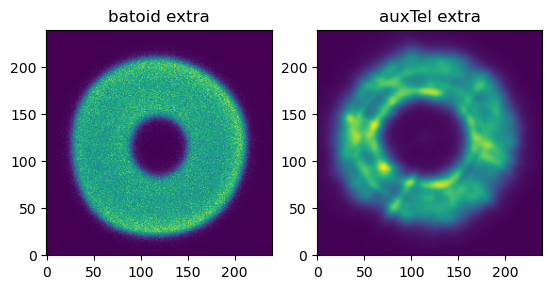

In [17]:
fig,ax = plt.subplots(1,2)
ax[0].imshow(stamp_extra_batoid , origin='lower')
ax[0].set_title('batoid extra')
ax[1].imshow(stamp_extra, origin='lower')
ax[1].set_title('auxTel extra')

Given these simulated donuts, fit with ts_wep , and compare with the actual input used to generate the image .... 

In [98]:

fieldXY = np.zeros(2)
fieldXYintra = fieldXY
fieldXYextra = fieldXY

wepZk2 = {}
for model in ['onAxis', 'paraxial']:
    wepZk2[model] = fit_ts_wep(stamp_intra_batoid, stamp_extra_batoid, 
                               fieldXYIntra=fieldXYintra, 
                               fieldXYExtra=fieldXYextra, 
                               sizeInPix = 240.,
                               opticalModel=model)

In [99]:
fit_to_image = np.array([
        4.25638271e+01, -1.15640675e+01,  1.51067425e+02, -1.38813010e+01,
        7.51286739e-01,  1.89297032e+01,  3.71368769e+01, -2.38633952e+01,
       -1.13242692e+01,  1.50160423e-01,  2.13837556e+01, -2.91929923e+00,
       -6.11499325e+00,  4.13259819e+00, -8.79025639e-01, -3.20899222e+00,
        2.33676452e+00,  1.24872601e+01,  1.37147970e+01])

fit_to_batoid = wepZk2['onAxis']

Text(0, 0.5, 'Zk value [nm]')

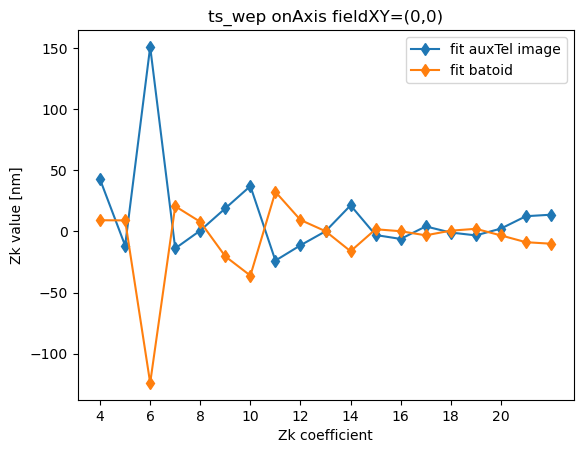

In [100]:
plt.figure()
    
model = 'onAxis'
plt.title(f'ts_wep {model} fieldXY=(0,0)')

plt.plot(np.arange(4,23), fit_to_image, '-d', label=f'fit auxTel image')
plt.plot(np.arange(4,23), fit_to_batoid, '-d', label=f'fit batoid')
plt.xticks(range(4,22)[::2])
plt.legend()
plt.xlabel('Zk coefficient')
plt.ylabel('Zk value [nm]')

The interesting thing is that  I have to add `-` sign to get the "input" : 

Text(0, 0.5, 'Zk value [nm]')

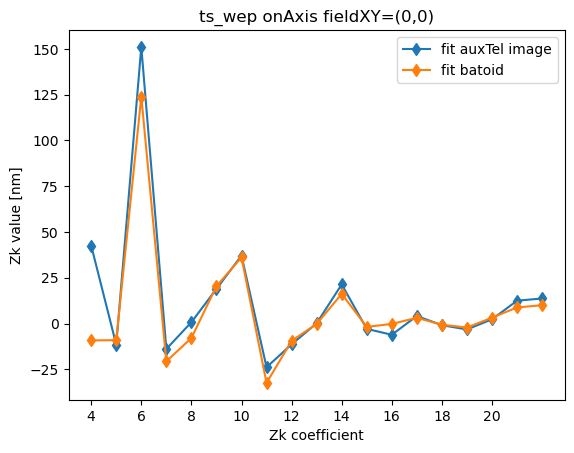

In [101]:
plt.figure()
    
model = 'onAxis'
plt.title(f'ts_wep {model} fieldXY=(0,0)')

plt.plot(np.arange(4,23), fit_to_image, '-d', label=f'fit auxTel image')
plt.plot(np.arange(4,23), -fit_to_batoid, '-d', label=f'fit batoid')
plt.xticks(range(4,22)[::2])
plt.legend()
plt.xlabel('Zk coefficient')
plt.ylabel('Zk value [nm]')

That's a  pretty good agreement! 